#### Danh sách thành viên
##### 1. Trần Văn Phát - 5210091?
##### 2. Bùi Văn Thống - 52100???
##### 3. Nguyễn Minh Phú - 52100920

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plotter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('./traffic.csv')

In [10]:
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [11]:
from collections import Counter

Target của dataset này là "Traffic Situation" trong đó có 4 lớp

In [12]:
np.unique(df['Traffic Situation'].values)

array(['heavy', 'high', 'low', 'normal'], dtype=object)

### Spliting dataset

Tách thành tập train và test, để dành cho việc tách tập train thành 1 tập validation sau này

In [13]:
Train, Test = train_test_split(df, test_size=0.25,random_state=2022)

In [14]:
print("Shape of train: ", Train.shape)
print("Shape of test", Test.shape)

Shape of train:  (4464, 9)
Shape of test (1488, 9)


### Preprocessing

Biểu đồ dưới đây nhằm mục đích đánh số cho các feature và target thuộc categorical là "Day of the week" và "Traffic Situation" 

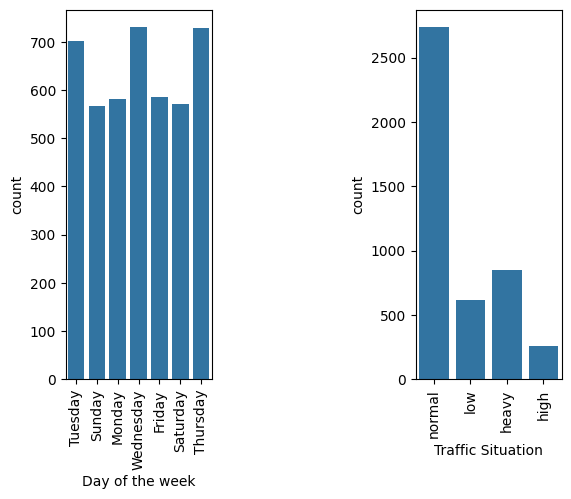

In [15]:
plt.subplot(1, 3, 1)
sns.countplot(x = Train["Day of the week"])
plotter.xticks(rotation = 90)
plt.subplot(1, 3, 3)
sns.countplot(x = Train["Traffic Situation"])
plotter.xticks(rotation = 90)
plt.show()

Trong dataset này 2 categorial features là "Time" và "Day of the week" và một target cũng có categorical.\
Thông thường với các categorical features dạng thứ thứ bậc ta có thể dùng OrdinalEncoder trong sklearn để thực hiện việc encode. \
OrdinalEncoder giúp ta có thể encode n categories trong 1 categorical feature thành các số nguyên từ 0 đến n - 1. \
Tuy nhiên, OrdinalEncoder encode các categories một cách ngẫu nhiên.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
tmpTrain = Train

enc  = OrdinalEncoder()
enc.fit_transform(np.array([tmpTrain['Day of the week']]).reshape(-1, 1))
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in day_of_week :
    print(f'Category: {day} -> Encode {enc.transform(np.array([[day]]).reshape(-1, 1))}')

Category: Monday -> Encode [[1.]]
Category: Tuesday -> Encode [[5.]]
Category: Wednesday -> Encode [[6.]]
Category: Thursday -> Encode [[4.]]
Category: Friday -> Encode [[0.]]
Category: Saturday -> Encode [[2.]]
Category: Sunday -> Encode [[3.]]


Vì mục tiêu là dự đoán chính xác, chúng tôi cài đặt thủ công về việc encode "Day of the week" thủ công. \
Tương tự đối với target "Traffic Situation", ta cũng có thể encode bằng LabelEncoder trong sklearn, tuy nhiên vẫn phải encode thủ công.\
Còn với feature "Time" ta có thể dùng OrdinalEncoder (hoặc LabelEncoder) để thực hiện encode.

In [19]:
day_of_week_enc = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

traffic_sistuation = {
    'low': 0,
    'normal': 1,
    'high': 2, 
    'heavy':3
}

In [20]:
enc = OrdinalEncoder()

df_temp_Train = Train
df_temp_Test = Test

df_temp_Train['Day of the week'] = df_temp_Train['Day of the week'].replace(day_of_week_enc)
df_temp_Train['Time'] =  enc.fit_transform(np.array([df_temp_Train['Time']]).reshape(-1, 1)).reshape(-1)
df_temp_Train['Traffic Situation'] = df_temp_Train['Traffic Situation'].replace(traffic_sistuation)

df_temp_Test['Day of the week'] = df_temp_Test['Day of the week'].replace(day_of_week_enc)
df_temp_Test['Time'] =  enc.transform(np.array([df_temp_Test['Time']]).reshape(-1, 1)).reshape(-1)
df_temp_Test['Traffic Situation'] = df_temp_Test['Traffic Situation'].replace(traffic_sistuation)

Train = df_temp_Train
Test = df_temp_Test

In [21]:
Train

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
5703,94.0,7,2,31,10,40,9,90,1
521,2.0,15,7,46,5,11,13,75,0
2013,11.0,30,1,9,1,0,31,41,1
4808,32.0,29,7,18,4,1,31,54,1
5637,59.0,6,1,119,28,46,9,202,3
...,...,...,...,...,...,...,...,...,...
5809,19.0,8,3,69,10,4,24,107,1
4720,48.0,28,6,18,3,0,17,38,0
173,75.0,11,3,72,1,9,32,114,2
1244,9.0,22,7,8,1,1,22,32,1


Sau khi đã thực hiện việc encode các categorical features. Bước tiếp theo là scale data về một khoảng nào đó để dễ tính toán.\
Chúng tôi, xin sử dụng StandardScaler trong sklearn đễ thực hiện.\
Đầu tiên cần tách thêm một lần nữa 2 tập Train, Test thành X_Train, y_train, X_test, y_test.

In [22]:
X_train = Train.drop(['Traffic Situation'], axis=1).values
y_train = Train['Traffic Situation'].values

X_test = Test.drop(['Traffic Situation'], axis=1).values
y_test = Test['Traffic Situation'].values

In [23]:
print('X_train:')
print(X_train)
print('='*64)

print('y_train:')
print(y_train)
print('='*64)

print('X_test:')
print(X_test)
print('='*64)

print('y_test:')
print(y_test)
print('='*64)

X_train:
[[ 94.   7.   2. ...  40.   9.  90.]
 [  2.  15.   7. ...  11.  13.  75.]
 [ 11.  30.   1. ...   0.  31.  41.]
 ...
 [ 75.  11.   3. ...   9.  32. 114.]
 [  9.  22.   7. ...   1.  22.  32.]
 [ 11.  30.   1. ...   0.  27.  42.]]
y_train:
[1 0 1 ... 2 1 1]
X_test:
[[ 85.  28.   6. ...  15.  32. 129.]
 [ 17.  22.   7. ...   1.  26.  91.]
 [ 69.   7.   2. ...  11.  32. 108.]
 ...
 [ 95.  29.   7. ...   2.  29.  38.]
 [ 57.  16.   1. ...  33.  13. 184.]
 [  2.  20.   5. ...  16.  10. 153.]]
y_test:
[2 1 1 ... 1 3 1]


Tiếp theo đây sẽ scale các tập X.

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7
0,1.690340,-1.001728,-0.981514,-0.775747,-0.191491,2.178304,-0.881356,-0.347881
1,-1.647204,-0.106490,1.603734,-0.440935,-0.628289,-0.152152,-0.514344,-0.616231
2,-1.320705,1.572081,-1.498563,-1.266804,-0.977727,-1.036118,1.137213,-1.224491
3,-0.558874,1.460176,1.603734,-1.065917,-0.715648,-0.955758,1.137213,-0.991921
4,0.420622,-1.113633,-1.498563,1.188481,1.380983,2.660467,-0.881356,1.655799
...,...,...,...,...,...,...,...,...
4459,-1.030484,-0.889823,-0.464464,0.072443,-0.191491,-0.714676,0.494941,-0.043751
4460,0.021568,1.348271,1.086684,-1.065917,-0.803008,-1.036118,-0.147331,-1.278161
4461,1.001065,-0.554109,-0.464464,0.139405,-0.977727,-0.312873,1.228966,0.081479
4462,-1.393260,0.676843,1.603734,-1.289125,-0.977727,-0.955758,0.311434,-1.385501


### Sử dụng các models học máy cơ bản

Vì vấn đề trong bài toán này là Classification, nên chúng tôi sẽ sử dụng các mô hình học máy giải quyết về vấn đề classification.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC

Chúng tôi cũng sử dụng classification_report để đáng giá các model

In [29]:
from sklearn.metrics import classification_report

Để đảm bảo tính công bằng các model sẽ không được cài đặt (configure) các tham số mà chỉ để các tham số ở mặc định

In [30]:
clfs = [
    KNeighborsClassifier(), 
    LogisticRegression(), 
    GaussianNB(), 
    RandomForestClassifier(), 
    AdaBoostClassifier(), 
    GradientBoostingClassifier(), 
    BaggingClassifier(), 
    SVC()
]

In [31]:
for clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf)
    print(classification_report(y_test, y_pred))
    print('='*64)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       219
           1       0.90      0.96      0.93       874
           2       0.76      0.49      0.60       110
           3       0.93      0.93      0.93       285

    accuracy                           0.90      1488
   macro avg       0.88      0.81      0.84      1488
weighted avg       0.90      0.90      0.90      1488

LogisticRegression()
              precision    recall  f1-score   support

           0       0.84      0.74      0.78       219
           1       0.87      0.94      0.91       874
           2       0.77      0.40      0.53       110
           3       0.96      0.98      0.97       285

    accuracy                           0.88      1488
   macro avg       0.86      0.77      0.80      1488
weighted avg       0.88      0.88      0.87      1488

GaussianNB()
              precision    recall  f1-score   support

           0      

Các mô hình Học Máy cơ bản có tỉ lệ dự đoán đúng cao, ví dụ như ở chỉ số accurancy của các mô hình luôn nằm trong khoảng từ 0.8 đến 1.0.\
Trong đó các mô hình dự đoán cao nhất có accuracy là 1.0 là Random Forest Classifier, Gradient Boosting Classifier, Bagging Classifier.\
Tiếp theo hãy thực nghiệm dữ liệu với Feed Forward Neural Network và Recurrent Neural Network.

### Sử dụng Feed Forward Neural Network và Recurrent Neural Network

#### Feed Forward Neural Network (FFNN)

In [32]:
import tensorflow as tf
import keras
from keras import layers

In [39]:
model = keras.models.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax') # target có 4 classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Vì vấn đề là classification, và output layer có activation là softmax, nên target cần phải encode theo onehot (có thể dùng dummy, hoặc to_categorial của keras.utils).\
Ở đây chúng tôi xin sử dụng to_categorical trong keras.utils.

In [100]:
import copy
from keras.utils import to_categorical
y_train_tmp = copy.copy(y_train)
y_train_tmp = to_categorical(y_train_tmp)
y_train_onehot = y_train_tmp

Training FFNN

In [108]:
model.fit(X_train, y_train_onehot, epochs=200, batch_size=100, verbose=2)

Epoch 1/200


45/45 - 1s - loss: 1.2180 - accuracy: 0.4745 - 750ms/epoch - 17ms/step
Epoch 2/200
45/45 - 0s - loss: 0.8371 - accuracy: 0.7222 - 59ms/epoch - 1ms/step
Epoch 3/200
45/45 - 0s - loss: 0.6985 - accuracy: 0.7386 - 58ms/epoch - 1ms/step
Epoch 4/200
45/45 - 0s - loss: 0.6101 - accuracy: 0.7601 - 57ms/epoch - 1ms/step
Epoch 5/200
45/45 - 0s - loss: 0.5309 - accuracy: 0.8017 - 60ms/epoch - 1ms/step
Epoch 6/200
45/45 - 0s - loss: 0.4597 - accuracy: 0.8495 - 57ms/epoch - 1ms/step
Epoch 7/200
45/45 - 0s - loss: 0.4010 - accuracy: 0.8658 - 62ms/epoch - 1ms/step
Epoch 8/200
45/45 - 0s - loss: 0.3538 - accuracy: 0.8757 - 57ms/epoch - 1ms/step
Epoch 9/200
45/45 - 0s - loss: 0.3193 - accuracy: 0.8864 - 57ms/epoch - 1ms/step
Epoch 10/200
45/45 - 0s - loss: 0.2945 - accuracy: 0.8905 - 54ms/epoch - 1ms/step
Epoch 11/200
45/45 - 0s - loss: 0.2738 - accuracy: 0.8967 - 61ms/epoch - 1ms/step
Epoch 12/200
45/45 - 0s - loss: 0.2588 - accuracy: 0.9021 - 67ms/epoch - 1ms/step
Epoch 13/200
45/45 - 0s - loss: 0.2

Tóm tắt các thông tin sau khi train

In [109]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 16)                144       
                                                                 
 dense_21 (Dense)            (None, 32)                544       
                                                                 
 dense_22 (Dense)            (None, 4)                 132       
                                                                 
Total params: 820 (3.20 KB)
Trainable params: 820 (3.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Predict

In [114]:
y_pred = model.predict(X_test)
y_pred

47/47 [==============================] - 0s 2ms/step


array([[2.79702461e-22, 6.17517158e-02, 9.38248336e-01, 7.79727550e-16],
       [4.48850638e-19, 1.00000000e+00, 9.89710601e-18, 1.05858330e-28],
       [4.82290286e-30, 9.85349655e-01, 1.46502936e-02, 1.22002545e-23],
       ...,
       [3.07369072e-30, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.63725099e-13, 6.22724835e-03, 5.37539541e-04, 9.93235171e-01],
       [2.89651666e-07, 9.99999642e-01, 2.41934339e-09, 6.48902869e-08]],
      dtype=float32)

Với mỗi hàng trong ma trận trên chính là xác xuất của từng class khi model dự đoán 1 input.\
Với mỗi hàng ta sẽ lấy index của element có giá trị lớn nhất, index này cũng chính là class mà model dự đoán cho 1 input.

In [115]:
y_pred = y_pred.argmax(axis=1)
y_pred

array([2, 1, 1, ..., 1, 3, 1], dtype=int64)

Ta thấy rằng model FFNN này có tỉ lệ dự đóan của model này ở mức cao lên đến <b>99%<b>

In [116]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       219
           1       0.98      0.99      0.99       874
           2       0.95      0.95      0.95       110
           3       0.99      0.99      0.99       285

    accuracy                           0.99      1488
   macro avg       0.98      0.98      0.98      1488
weighted avg       0.99      0.99      0.99      1488



#### Recurrent Neural Network

Sử dụng early stopping để tránh overfitting

In [50]:
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

Chọn feature time làm dữ liệu, target vẫn là traffic situation

In [51]:
df_tmp = df
df_tmp['Time'] = pd.to_datetime(df_tmp['Time'])
df_tmp['Time'] = df_tmp['Time'].apply(lambda x: x.timestamp())

In [52]:
X = df_tmp[['Time']]
y = df_tmp['Traffic Situation'].values

Scaling data

In [53]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Tách dữ liệu

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Encode target

In [55]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.transform(y_test))

Tạo model RNN với Long Short Term Memory

In [56]:
model = keras.models.Sequential([
    layers.LSTM(128, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.01)),
    layers.Dense(4, activation='softmax')
])

In [57]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [59]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [60]:
model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=100, callbacks=[early_stopping])

Epoch 1/200
48/48 [==============================] - 3s 14ms/step - loss: 1.3421 - accuracy: 0.5812 - val_loss: 1.2674 - val_accuracy: 0.6280
Epoch 2/200
48/48 [==============================] - 0s 6ms/step - loss: 1.2081 - accuracy: 0.6011 - val_loss: 1.1167 - val_accuracy: 0.6280
Epoch 3/200
48/48 [==============================] - 0s 6ms/step - loss: 1.1023 - accuracy: 0.6011 - val_loss: 1.0475 - val_accuracy: 0.6280
Epoch 4/200
48/48 [==============================] - 0s 6ms/step - loss: 1.0721 - accuracy: 0.6011 - val_loss: 1.0344 - val_accuracy: 0.6280
Epoch 5/200
48/48 [==============================] - 0s 6ms/step - loss: 1.0625 - accuracy: 0.6011 - val_loss: 1.0300 - val_accuracy: 0.6280
Epoch 6/200
48/48 [==============================] - 0s 6ms/step - loss: 1.0571 - accuracy: 0.6011 - val_loss: 1.0268 - val_accuracy: 0.6280
Epoch 7/200
48/48 [==============================] - 0s 8ms/step - loss: 1.0535 - accuracy: 0.6011 - val_loss: 1.0246 - val_accuracy: 0.6280
Epoch 8/200


Đánh giá kết quả sau khi train.\
Nhìn chung RNN không dự đoán quá chính xác.

In [61]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

38/38 [==============================] - 0s 3ms/step - loss: 0.9328 - accuracy: 0.6280
Loss: 0.9328271150588989, Accuracy: 0.6280436515808105


In [62]:
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
y_test = y_test.argmax(axis=1)
y_pred

38/38 [==============================] - 0s 3ms/step


array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       216
           1       0.00      0.00      0.00        81
           2       0.00      0.00      0.00       146
           3       0.63      1.00      0.77       748

    accuracy                           0.63      1191
   macro avg       0.16      0.25      0.19      1191
weighted avg       0.39      0.63      0.48      1191

